# Wrangle and Analyze Data: Twitter WeRateDogs

To begin with, let's gather our tweet data from our three sources: The archive, the online tsv file, and via the tweepy Twitter API;

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Access Twitter archiva data from given csv file
df_twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Make directory if it doesn't already exist
folder_name = 'tweet_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# response.content
with open(folder_name + '/' + "image_predictions.tsv", mode='wb') as file:
    file.write(response.content)


In [5]:
# Access tsv file from given URL source
df_predicted_images = pd.read_csv('tweet_predictions/image_predictions.tsv', sep = '\t', encoding = 'utf-8')

In [6]:
import tweepy

consumer_key = '---'
consumer_secret = '---'
access_token = '---'
access_secret = '---'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Test functionality of API:

In [7]:
tweet = api.get_status(666020888022790149, tweet_mode='extended')
print(tweet.full_text)

Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj


In [8]:
import json
with open('tweet_json.txt', 'a', encoding = 'utf8') as outfile:
    for tweet_id in df_twitter_archives['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            continue

tweets_data_info = []
tweet_file = open('tweet_json.txt', "r")
for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data_info.append(tweet)
    except:
        continue

tweet_file.close()


Rate limit reached. Sleeping for: 754
Rate limit reached. Sleeping for: 743


In [ ]:
# Create tweet_details dataframe from Twitter API calls
tweet_details = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_details = tweet_details.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_details = tweet_details.reset_index(drop=True)

## Assess Twitter archive data

In [10]:
df_twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There seem to be 181 tweets that are re-tweets, since the 3 labels concerning re-tweets have 181 non-null fields. In order to be sure that the 3 fields match up to the same tweets, I'll query the 181 rows and check for empty fields in the 3 labels.

In [12]:
df_twitter_archives[df_twitter_archives['retweeted_status_id'].isnull() == False]['retweeted_status_user_id'].isnull().sum().any()


False

In [13]:
df_twitter_archives[df_twitter_archives['retweeted_status_id'].isnull() == False]['retweeted_status_timestamp'].isnull().sum().any()


False

The re-tweet rows seem to be consistent, so we can drop those 181 rows in the clean step

Let's look at the rating data for this archive

In [14]:
df_twitter_archives['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
df_twitter_archives[df_twitter_archives['rating_denominator'] == 150]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [16]:
df_twitter_archives['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Almost all denominators of the ratings are 10; only 23 of the 2356 entries have denominator values other than 10. Upon further assessment, several unusually large denominators seem to also be accompanied by unusual numerators, so to begin with, it is safe to drop rows with denominators that are not 10, and then re-visit unusual numerator values to see what steps to take then. In other words, re-visit this assess step later.

Now let's move on to the name column. Null values are present, so for the non-null rows, let's see if there are any duplicate names:

In [17]:
df_twitter_archives.duplicated().sum()

0

In [18]:
df_twitter_archives[df_twitter_archives['name'].isnull() == False].duplicated().sum().any()

False

In [19]:
df_twitter_archives['name'].isnull().sum()

0

In [20]:
df_twitter_archives['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Daisy             7
Buddy             7
Toby              7
an                7
Bailey            7
Jack              6
Koda              6
Scout             6
Rusty             6
Stanley           6
Milo              6
Leo               6
Jax               6
Dave              6
Oscar             6
Bella             6
George            5
               ... 
Sandra            1
Brutus            1
Jaycob            1
Carper            1
Bobble            1
Dante             1
Oddie             1
Derby             1
Marty             1
Corey             1
Julius            1
Ed                1
Rambo             1
Bruno             1
Cleopatricia      1
Bluebert          1
Chuck             1
Mingus            1
Jaspers           1


While none of the name data is actually a null empty value, It appears that over 700 entries contain a string 'None' in place of the name. In addition, several entries contain 'the', 'a' and 'an' as the name, which could also be errors because they are lowercase compared to the rest of the (actual) names.<br><br> 

Upon further examination, it appears that certain tweets from WeRateDogs don't even include the name as part of the dog description, so that gives insight as to why some if not all the 745 entries contain 'None' names. In this case, with our given data, there doesn't seem to by anything that can be done about this at this point. 

To keep the name data correct and consistent however, I will drop the rows that contain  'the', 'a' and 'an' as the name during the cleaning step.

There are also other 'unintentional' words that are present in the Names column like 'such', which happen to be lowercase, that should also be tended to during the cleaning stage.

Another tidiness issue is the four 'dog stages' columns not being combined into one single column. This will be fixed in the cleaning step. 

Let's take a look at the 'lowercase' names that are present:

In [21]:
df_twitter_archives[df_twitter_archives['name'].str.islower()]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
getting          2
mad              2
actually         2
not              2
incredibly       1
unacceptable     1
my               1
old              1
space            1
by               1
his              1
this             1
life             1
such             1
infuriating      1
light            1
all              1
officially       1
Name: name, dtype: int64

None of these are appropriate names and are obviously errors. But just to see if they can be fixed, let's examine one of these rows and see if the name actually exists (because it would be 'None' if it didn't) and if it is possible to query the names from the tweets. 

In [22]:
row = df_twitter_archives.query('name == "life"')
row_id = df_twitter_archives.at[row.index[0], 'tweet_id']
tweet = api.get_status(row_id, tweet_mode='extended')
print(tweet.full_text)

This is life-changing. 12/10 https://t.co/SroTpI6psB


No name present. And for some weird reason, the output above links to a Vine video (I'm not a big Twitter user, maybe there's a reason for that). Let's check another one:

In [23]:
row = df_twitter_archives.query('name == "his"')
row_id = df_twitter_archives.at[row.index[0], 'tweet_id']
tweet = api.get_status(row_id, tweet_mode='extended')
print(tweet.full_text)

That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7


Interesting, so it looks like certain entries do indeed have names, but other words were filled in for the name label instead. Let's view the tweet text for all the entries with incorrect names (in Excel to make it easier):

In [24]:
df_weird_names = df_twitter_archives[df_twitter_archives['name'].str.islower()]
df_weird_names.reset_index(inplace=True)
df_weird_names

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
1,56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
2,118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
3,169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
4,193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
5,335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
6,369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
7,542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
8,649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
9,682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [25]:
df_weird_names.to_csv('weird_names.csv')

In [26]:
df_weird_names.shape

(109, 18)

Several of the 'incorrect name' entries do have names included in the text, and there is no programatic way to check if a tweet not only contains a name, but what word of the text that it is. Parity cannot be used to distinguish the name in this case. Therefore, the only way to check for potential missed names is to check the tweets manually, preferrably in Excel. This issue will be addressed in the cleaning portion. 

To recap, the issues to fix include:<br>
-Merge the 3 datasets on the tweet id<br>
-Take care of missing data<br>
-Fix the four 'dog stages' columns not being combined into one single column<br>
-Drop the re-tweet rows<br>
-Drop certain rows with unusual ratings<br>
-Drop the rows that contain 'the', 'a' and 'an' as the name<br>
-Fix incorrect name data on certain entries. 

Edit: 
I later realized that all the 3 columns of tweet_details needs to be casted from object to int, so this also counts as an issue needing to be fixed. 

## Clean Twitter archive data

In [27]:
df_archive_clean = df_twitter_archives.copy()

In [28]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
df_predicted_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
# tweet_details.reset_index(inplace=True)
# tweet_details.drop(columns='index', inplace=True)
tweet_details.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8031,37353
0,892177421306343426,5960,32108
0,891815181378084864,3942,24213
0,891689557279858688,8183,40651
0,891327558926688256,8873,38879


In [31]:
tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4109 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          4109 non-null object
retweet_count     4109 non-null object
favorite_count    4109 non-null object
dtypes: object(3)
memory usage: 128.4+ KB


#### Cast the 3 columns from type object to int64:

In [32]:
tweet_details.tweet_id = tweet_details.tweet_id.astype('int64')
tweet_details.retweet_count = tweet_details.retweet_count.astype('int64')
tweet_details.favorite_count = tweet_details.favorite_count.astype('int64')
tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4109 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          4109 non-null int64
retweet_count     4109 non-null int64
favorite_count    4109 non-null int64
dtypes: int64(3)
memory usage: 128.4 KB


In [33]:
tweet_details.reset_index(inplace=True)
tweet_details.head()

,index,tweet_id,retweet_count,favorite_count
0,0,892420643555336193,8031,37353
1,0,892177421306343426,5960,32108
2,0,891815181378084864,3942,24213
3,0,891689557279858688,8183,40651
4,0,891327558926688256,8873,38879


In [34]:
tweet_details['tweet_id'].duplicated().sum()

1775

In [35]:
tweet_details.shape

(4109, 4)

#### Merge the 3 datasets together:

In [66]:
# df_clean_merged = 
df_clean_merged = df_archive_clean.merge(df_predicted_images, on='tweet_id').merge(tweet_details, on='tweet_id')
# df_clean_merged = df_clean_merged.merge(tweet_details, on='tweet_id')
df_clean_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,0,8031,37353
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,0,8021,37357
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,0,5960,32108
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,0,5948,32102
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,0,3942,24213


#### Drop the re-tweet rows:

In [67]:
retweeted = df_clean_merged[df_clean_merged['retweeted_status_id'].isnull() == False]
retweeted

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count
64,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,True,seat_belt,0.057091,False,pug,0.011933,True,0,17581,0
65,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,True,seat_belt,0.057091,False,pug,0.011933,True,0,17560,0
134,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,0,77,0
135,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,0,77,0
214,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,True,papillon,0.211766,True,Pekinese,0.112952,True,0,118,0
215,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,True,papillon,0.211766,True,Pekinese,0.112952,True,0,118,0
260,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,False,oscilloscope,0.012591,False,paper_towel,0.011178,False,0,796,0
261,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,False,oscilloscope,0.012591,False,paper_towel,0.011178,False,0,796,0
334,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,False,purse,0.066505,False,pillow,0.044725,False,0,20,0
335,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,False,purse,0.066505,False,pillow,0.044725,False,0,20,0


In [68]:
df_clean_merged.drop(retweeted.index, inplace=True)
df_clean_merged.drop_duplicates(subset='tweet_id', inplace=True)
df_clean_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,0,8031,37353
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,0,5960,32108
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,0,3942,24213
6,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,8183,40651
8,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,8873,38879


In [69]:
df_clean_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'index', 'retweet_count',
       'favorite_count'],
      dtype='object')

#### Fix the four 'dog stages' columns not being combined into one single column:

In [70]:
temp = df_clean_merged.loc[:, 'doggo':'puppo'].replace('None', np.nan)
temp

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN
18,doggo,NaN,NaN,NaN


In [71]:
(df_clean_merged.loc[:, 'doggo':'puppo'].replace('None', '').loc[18, :].unique().tolist())
# arr.remove('None')
# arr

['doggo', '']

In [72]:
arr = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean_merged.loc[18, 'doggo':'puppo'].unique().shape[0]


2

In [73]:
def transform(row):
    value = np.nan
    if row.unique().shape[0] > 1:
        value = row.unique()[0] if row.unique()[0] in arr else row.unique()[1]
    return value


In [74]:
temp['nickname'] = temp.apply(transform, axis=1)

In [75]:
temp

,doggo,floofer,pupper,puppo,nickname
0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN
18,doggo,NaN,NaN,NaN,doggo


Let's apply this technique to the actual dataset:

In [76]:
df_clean_merged['nickname'] = temp['nickname']
df_clean_merged.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
df_clean_merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count,nickname
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,0,8031,37353,NaN
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,0,5960,32108,NaN
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,0,3942,24213,NaN
6,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,8183,40651,NaN
8,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,8873,38879,NaN
10,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0,2948,19549,NaN
12,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Border_collie,0.199287,True,ice_lolly,0.193548,False,0,1950,11410,NaN
14,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,0,17900,62957,NaN
16,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,0,4053,26881,NaN
18,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,0,6984,30811,doggo


In [77]:
df_clean_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'index',
       'retweet_count', 'favorite_count', 'nickname'],
      dtype='object')

#### Now let's check out the incorrect names of the dataset:

In [78]:
weird_names = df_clean_merged[df_clean_merged['name'].str.islower()]
weird_names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count,nickname
42,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,...,tow_truck,0.029175,False,shopping_cart,2.632080e-02,False,0,11116,44706,NaN
100,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,Angora,0.272066,False,Persian_cat,1.148540e-01,False,0,15166,47725,pupper
276,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,...,malamute,0.216163,True,Persian_cat,1.283830e-01,False,0,29808,88995,NaN
304,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,...,Pekinese,0.188220,True,Japanese_spaniel,8.262820e-02,True,0,8222,29880,NaN
568,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,...,Chesapeake_Bay_retriever,0.198560,True,vizsla,5.619990e-02,True,0,1418,9865,NaN
858,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,...,Pomeranian,0.040783,True,Eskimo_dog,2.127450e-02,True,0,1269,6763,NaN
1028,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,...,lighter,0.081941,False,switch,3.900860e-02,False,0,4245,15094,NaN
1274,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,...,Border_collie,0.128352,True,Saint_Bernard,5.947550e-02,True,0,1781,6763,NaN
1306,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,...,skunk,0.161184,False,paper_towel,9.157150e-02,False,0,1843,7629,NaN
1362,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,...,Cardigan,0.330401,True,Shetland_sheepdog,3.887490e-02,True,0,3567,27563,NaN


In [79]:
weird_names.shape

(98, 28)

In [80]:
df_clean_merged.shape

(1988, 28)

Because editing names manually is the only way to effectively fix the names of those rows that do actually have names, for the sake of this project it is better to drop those rows, considering they make up a reasonably small portion of the dataset as shown above

In [81]:
df_clean_merged.drop(index=weird_names.index, inplace=True)
df_clean_merged.shape

(1890, 28)

#### Now let's check out the unusual ratings in some of the tweets

In [82]:
df_clean_merged['rating_numerator'].value_counts()

12      436
10      396
11      380
13      253
9       137
8        88
7        46
5        32
14       31
6        30
3        18
4        13
2         7
1         4
0         2
420       1
1776      1
26        1
27        1
44        1
45        1
50        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
24        1
Name: rating_numerator, dtype: int64

In [83]:
df_clean_merged['rating_denominator'].value_counts()

10     1875
80        2
50        2
11        2
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
Name: rating_denominator, dtype: int64

Let's get the rows with unusually large numerators:

In [84]:
large_numerator = df_clean_merged[df_clean_merged['rating_numerator'] > 14]
large_numerator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count,nickname
672,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,kuvasz,0.059526,True,Samoyed,0.037400,True,0,3405,12734,NaN
812,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,0,1535,5604,NaN
1096,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,Persian_cat,0.122978,False,chow,0.102654,True,0,6486,19127,NaN
1208,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,0,1708,6854,pupper
1448,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,0,2326,4979,NaN
1582,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,...,sunglasses,0.080822,False,sunglass,0.050776,False,0,2554,5285,NaN
1980,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,malamute,0.317053,True,Eskimo_dog,0.273419,True,0,217,2426,NaN
2022,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,...,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,0,757,2910,NaN
2072,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,...,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,0,577,2369,NaN
2108,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,...,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,0,664,2488,NaN


In [85]:
large_denominator = df_clean_merged[df_clean_merged['rating_denominator'] != 10]
large_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count,nickname
672,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,...,kuvasz,0.059526,True,Samoyed,0.037400,True,0,3405,12734,NaN
812,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,0,1535,5604,NaN
1448,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,0,2326,4979,NaN
1730,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,...,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,0,13758,35802,NaN
1912,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,...,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,0,1605,4201,NaN
1980,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,malamute,0.317053,True,Eskimo_dog,0.273419,True,0,217,2426,NaN
2022,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,...,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,0,757,2910,NaN
2072,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,...,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,0,577,2369,NaN
2108,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,...,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,0,664,2488,NaN
2392,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,...,golden_retriever,0.000098,True,pug,0.000008,True,0,1426,3508,NaN


The number of rows that these rows take up are fairly small compared to the rest of the dataset, so it makes sense to drop them:

In [86]:
df_clean_merged.drop(index=large_numerator.index, inplace=True)
large_denominator = df_clean_merged[df_clean_merged['rating_denominator'] != 10]
df_clean_merged.drop(index=large_denominator.index, inplace=True)
df_clean_merged.shape

(1870, 28)

In [87]:
df_clean_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,index,retweet_count,favorite_count,nickname
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,0,8031,37353,NaN
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,0,5960,32108,NaN
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,0,3942,24213,NaN
6,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,8183,40651,NaN
8,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,8873,38879,NaN


## Analysis portion

In [88]:
df_clean_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'index',
       'retweet_count', 'favorite_count', 'nickname'],
      dtype='object')

In [89]:
df_clean_merged.loc[:, 'p1':'p3_dog']

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
4,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
6,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
8,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
10,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
12,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
14,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
16,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
18,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


Let's see the mean 'p1_conf' confidence level for the most confident predictions of the neural network which happen to be True:

In [90]:
df_clean_merged[df_clean_merged['p1_dog'] == True]['p1_conf'].mean()

0.6144636280144405

Let's see the mean 'p1_conf' confidence level for the most confident predictions which happen to be False:

In [91]:
df_clean_merged[df_clean_merged['p1_dog'] == False]['p1_conf'].mean()

0.536443104536082

While close, the confidence level in the predictions which happened to be correct were more than those which happened to be false. 

Let's look at the mean dog ratings for our dataset:

In [92]:
df_clean_merged['rating_numerator'].mean() / df_clean_merged['rating_denominator'].mean()

1.058716577540107

Due to the particular rating method the WeRateDogs Twitter account uses, a value greater than 1 is expected. 

Let's look at the proportion frequencies of the dog nicknames present:

In [97]:
nickname_values = df_clean_merged['nickname'].value_counts() / df_clean_merged['nickname'].value_counts().sum()
nickname_values

pupper     0.660959
doggo      0.239726
puppo      0.075342
floofer    0.023973
Name: nickname, dtype: float64

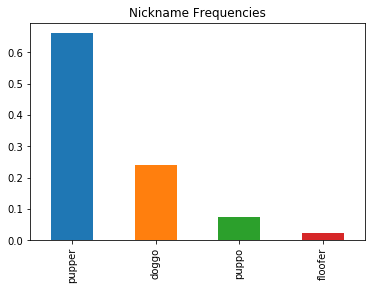

In [102]:
nickname_values.plot(kind='bar')
plt.title('Nickname Frequencies');